In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

In [3]:
os.chdir(os.getcwd())
# for MAC 
#data_set = "data/CO2 Decays.csv"

# for Windows
data_set = "data\CO2 Decays.csv"

df = pd.read_csv(data_set)

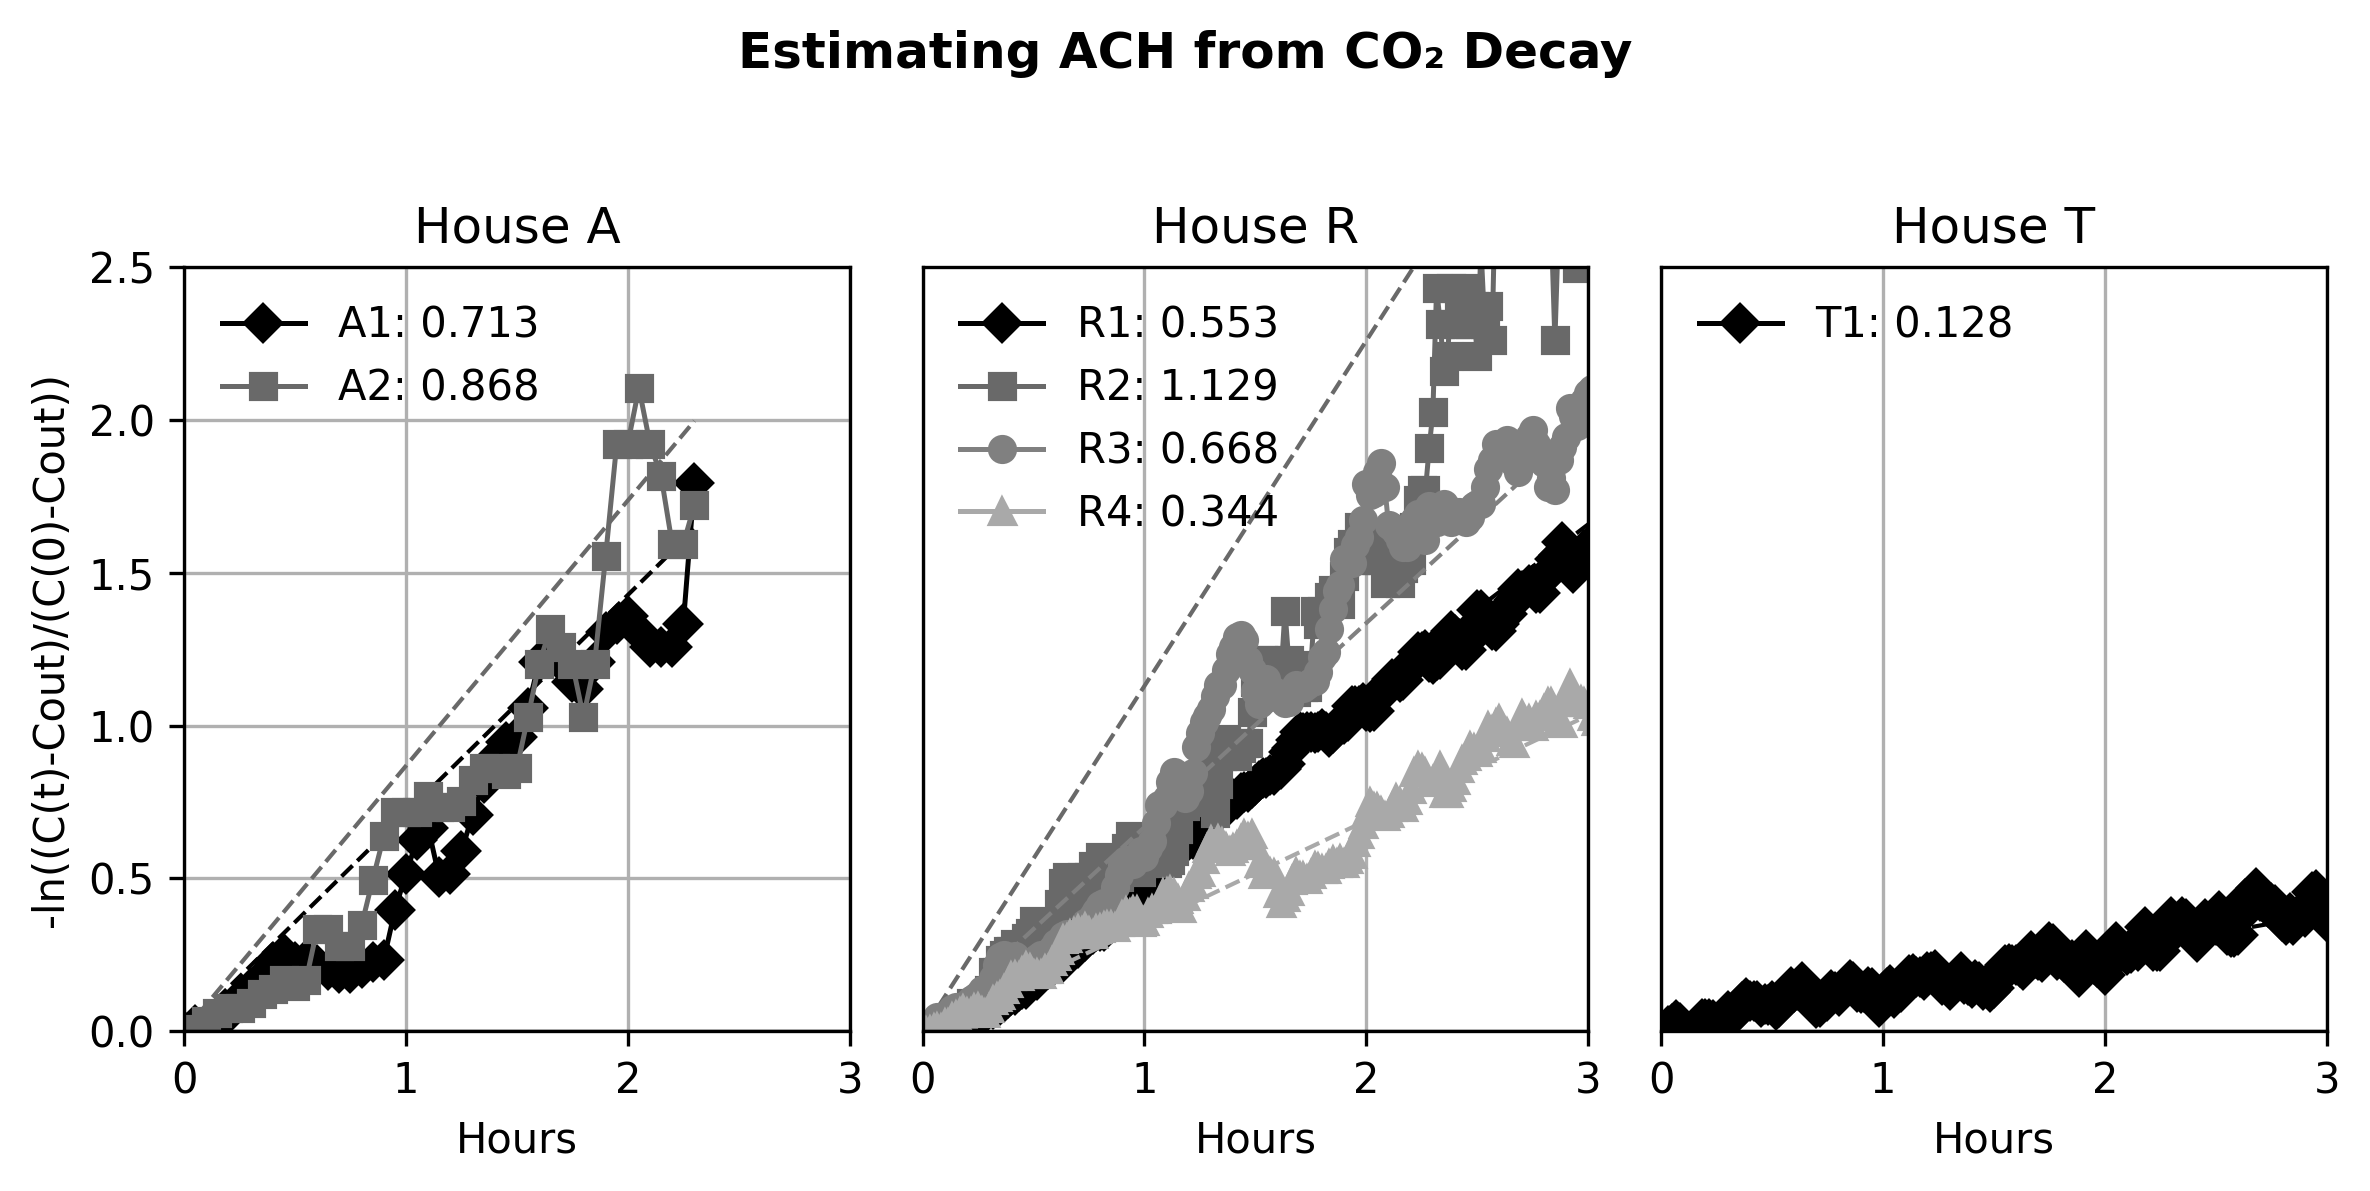

In [4]:
# Preprocess House A
df_a1 = df[['Hour', 'A First Decay']].dropna()
hour_a1 = df_a1['Hour'].tolist()
a1 = df_a1['A First Decay'].tolist()
m_a1, _ = np.polyfit(hour_a1, a1, 1)

df_a2 = df[['Hour', 'A Second Decay']].dropna()
hour_a2 = df_a2['Hour'].tolist()
a2 = df_a2['A Second Decay'].tolist()
m_a2, _ = np.polyfit(hour_a2, a2, 1)

# Preprocess House R
df_r1 = df[['Hours', 'R First Decay']].dropna()
hours_r1 = df_r1['Hours'].tolist()
r1 = df_r1['R First Decay'].tolist()
m_r1, _ = np.polyfit(hours_r1, r1, 1)

df_r2 = df[['Hours', 'R Second Decay']].dropna()
hours_r2 = df_r2['Hours'].tolist()
r2 = df_r2['R Second Decay'].tolist()
m_r2, _ = np.polyfit(hours_r2, r2, 1)

df_r3 = df[['Hours', 'R Third Decay']].dropna()
hours_r3 = df_r3['Hours'].tolist()
r3 = df_r3['R Third Decay'].tolist()
m_r3, _ = np.polyfit(hours_r3, r3, 1)

df_r4 = df[['Hours', 'R Fourth Decay']].dropna()
hours_r4 = df_r4['Hours'].tolist()
r4 = df_r4['R Fourth Decay'].tolist()
m_r4, _ = np.polyfit(hours_r4, r4, 1)

# Preprocess House T
df_t1 = df[['Hours', 'T First Decay']].dropna()
hours_t1 = df_t1['Hours'].tolist()
t1 = df_t1['T First Decay'].tolist()
m_t1, _ = np.polyfit(hours_t1, t1, 1)

# Function to add linear trend line
def add_trend_line(ax, x, y, slope, color, linestyle='--'):
    x_np = np.array(x)
    y_fit = slope * x_np
    ax.plot(x_np, y_fit, color=color, linestyle=linestyle, lw=1)

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 4), dpi=300)

marker_size = 6
legend_fontsize = 10

# House A
axs[0].plot(hour_a1, a1, label=f'A1: {round(m_a1, 3)}', lw=1.2, marker='D', markersize=marker_size, color='black')
add_trend_line(axs[0], hour_a1, a1, m_a1, 'black')
axs[0].plot(hour_a2, a2, label=f'A2: {round(m_a2, 3)}', lw=1.2, marker='s', markersize=marker_size, color='dimgray')
add_trend_line(axs[0], hour_a2, a2, m_a2, 'dimgray')
axs[0].axhline(0, color='black', lw=0.8)
axs[0].set_title('House A')
axs[0].set_ylabel('-ln((C(t)-Cout)/(C(0)-Cout))')

# House R
axs[1].plot(hours_r1, r1, label=f'R1: {round(m_r1, 3)}', lw=1.2, marker='D', markersize=marker_size, color='black')
add_trend_line(axs[1], hours_r1, r1, m_r1, 'black')
axs[1].plot(hours_r2, r2, label=f'R2: {round(m_r2, 3)}', lw=1.2, marker='s', markersize=marker_size, color='dimgray')
add_trend_line(axs[1], hours_r2, r2, m_r2, 'dimgray')
axs[1].plot(hours_r3, r3, label=f'R3: {round(m_r3, 3)}', lw=1.2, marker='o', markersize=marker_size, color='gray')
add_trend_line(axs[1], hours_r3, r3, m_r3, 'gray')
axs[1].plot(hours_r4, r4, label=f'R4: {round(m_r4, 3)}', lw=1.2, marker='^', markersize=marker_size, color='darkgray')
add_trend_line(axs[1], hours_r4, r4, m_r4, 'darkgray')
axs[1].axhline(0, color='black', lw=0.8)
axs[1].set_title('House R')

# House T
axs[2].plot(hours_t1, t1, label=f'T1: {round(m_t1, 3)}', lw=1.2, marker='D', markersize=marker_size, color='black')
add_trend_line(axs[2], hours_t1, t1, m_t1, 'black')
axs[2].axhline(0, color='black', lw=0.8)
axs[2].set_title('House T')

# Shared formatting
for ax in axs:
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 2.5])
    ax.set_xlabel('Hours')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.legend(fontsize=legend_fontsize, frameon=False, loc='upper left')
    ax.grid(True)

axs[1].set_yticks([])
axs[2].set_yticks([])

fig.suptitle('Estimating ACH from CO₂ Decay', fontsize=12, weight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Save as PDF
fig.savefig('ACH_CO2_Decay_Plot_LargerMarkers.pdf', format='pdf')


















